cuda:0
loading dataset preload:False
tensor([0., 0., 0., 0., 0., 0., 0., 0.])


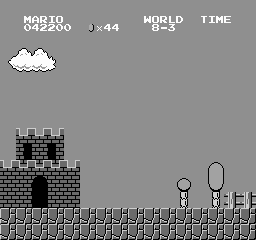

tensor([[[0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         ...,
         [0.8078, 0.4157, 0.4157,  ..., 0.4157, 0.3490, 0.0000],
         [0.7725, 0.3765, 0.3765,  ..., 0.3765, 0.0000, 0.0392],
         [0.4157, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4157]]])
tensor([0., 0., 0., 0., 0., 0., 0., 0.])


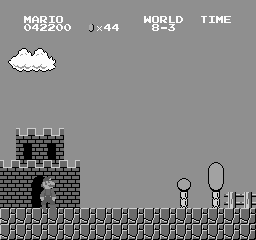

tensor([[[0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         ...,
         [0.8078, 0.4157, 0.4157,  ..., 0.4157, 0.3490, 0.0000],
         [0.7725, 0.3765, 0.3765,  ..., 0.3765, 0.0000, 0.0392],
         [0.4157, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4157]]])
tensor([0., 0., 0., 0., 0., 0., 0., 0.])


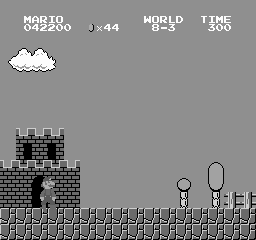

tensor([[[0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5608, 0.5608,  ..., 0.5608, 0.5608, 0.5608],
         ...,
         [0.8078, 0.4157, 0.4157,  ..., 0.4157, 0.3490, 0.0000],
         [0.7725, 0.3765, 0.3765,  ..., 0.3765, 0.0000, 0.0392],
         [0.4157, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4157]]])


In [11]:
import pathlib
import torch
import torchvision
import os
from PIL import Image
from tqdm import tqdm
from IPython.display import display # to display images
import sys

sys.path.append("../")
from helper_code.mario_buttons_dataset import MarioEpisode


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.manual_seed(17)


batch_size = 128
learning_rate = 1e-3
epochs = 7
    
group = 1#3
use_color = False

preload=False


print(f"loading dataset preload:{preload}")

transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((256,256)),
        torchvision.transforms.ToTensor(),
        
        #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

mario_epsode = MarioEpisode('../mario_dataset/Rafael_hwfrb471_e3_8-3_win/',group_frames=group,use_color=use_color,transform=None,preload=False)

for i in range(3):
    print(action:=mario_epsode._extract_action(mario_epsode.file_names[i]))
    image = mario_epsode._get_image(i)
    display(image)
    #tran = transforms(image)
    #print(tran)